# Detecção de pragas na soja com IA - AgriQuant - Versão 0.0.1
<br>
<br>

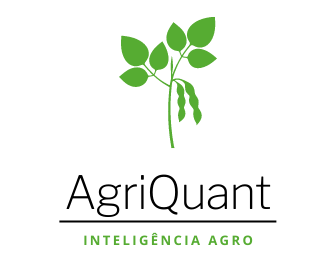

<br>
<br>

## Funções do modelo:
<br>
<br>

- Realizar a detecção de presença das pragas Anticarsia Gemmatalis, Diabrotica Speciosa ou se a região da imagem é classificada como saudável

<br>
<br>

## Instruções de uso:
<br>
<br>

1. Carregar a imagem com tamanho máximo de 500 KB
2. Pressionar o botão <font color='green'><b>"Run"</b></font> para obter os resultados

<br>
<br>

<font color='red'><b>Sempre confirme o tipo de praga detectada e o manejo necessário com seu Engenheiro Agronômo.</b></font>

<br>
<br>

## Exemplo de imagem a ser carregada para detecção:

<br>
<br>

Para melhores resultados da detecção, carregar imagem com distância e luminosidade similar ao exemplo.

<br>

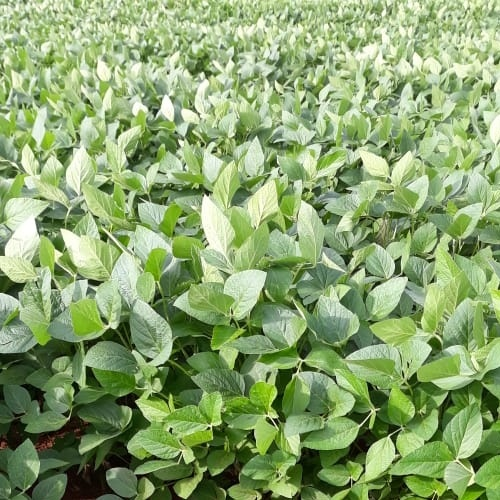

<br>
<br>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [ ]:
label_names = {0:'Anticarsia Gemmatalis', 1:'Diabrotica Speciosa', 2:'Saudável'}

In [ ]:
with open('soybean-classifier-model.json', 'r') as json_file:
    json_saved_model = json_file.read()

In [ ]:
model = tf.keras.models.model_from_json(json_saved_model)
model.load_weights('weights.hdf5')

In [ ]:
image_path = 'healthy_.jpg'

In [ ]:
img = mpimg.imread(image_path)

<br>
<br>

# 1. Imagem carregada

<br>
<br>

In [ ]:
plt.figure(figsize = (8,8))
plt.imshow(img)
plt.axis('off');

In [ ]:
img = cv2.resize(img, (256, 256))

In [ ]:
img = img / 255

In [ ]:
img = img.reshape(-1, 256, 256, 3)

<br>
<br>

# 2. Resultados da detecção

<br>
<br>

In [ ]:
prediction = model.predict(img)

In [ ]:
pred_class = np.argmax(prediction)

In [ ]:
result = label_names[pred_class], prediction[0][pred_class]

In [ ]:
if result[0] == 'Anticarsia Gemmatalis':
    show = mpimg.imread('anticarsia.jpg')
elif result[0] == 'Diabrotica Speciosa':
    show = mpimg.imread('diabrotica.jpg')
else:
    show = mpimg.imread('healthy.jpg')

plt.figure(figsize = (4,4))
plt.imshow(show)
plt.title('Detecção: {}\nProbabilidade: {}%'.format(result[0], round(result[1]*100,2)), fontsize = 20)
plt.axis('off');